In [16]:
@time begin
    n = 5000;
    A = rand(n,n);
    A⁻¹ = inv(A);
end;

  7.129110 seconds (1.05 M allocations: 434.971 MiB, 1.88% gc time)


In [18]:
😢 = 5
❤ = 3
😢 +  ❤ ;

In [19]:
##################
## Brown model
##################

##################
# Parámetros
##################
b = 1.0 
k = 4.0
sigma2_b = 0.01
sigma2_f = 0.000158
sigma2_e = 0.0045
n = 80
p = 50:201;

In [20]:
##################
# Modelo teórico
##################
k = 4.

@time begin
    lambda_1 = [sigma2_f*i*((b^2)*k+sigma2_b)+sigma2_e for i in p]
    lambda_2 = [sigma2_f*i*sigma2_b+sigma2_e for i in p]
    lambda_3 = [sigma2_e for i in p];
end;

  0.114825 seconds (226.59 k allocations: 11.446 MiB)


In [21]:
# import Pkg; Pkg.add("Plots")

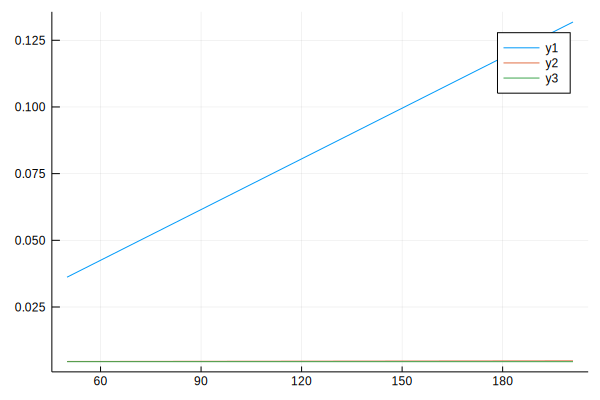

In [22]:
using Plots

plot(p, lambda_1)
plot!(p, lambda_2)
plot!(p, lambda_3)


In [3]:
####################
# Modelo Empírico 2
####################

Matriz = zeros((151, 5))
LOWER = zeros((151, 5))
UPPER = zeros((151, 5));
##################
# Parámetros
##################
b = 1.0 
k = 4.0
sigma2_b = 0.01
sigma2_f = 0.000158
sigma2_e = 0.0045
n = 80
p = 50:201;

In [ ]:
#import Pkg; Pkg.add("Distributions")

In [4]:
using Random, Distributions
using LinearAlgebra
using Statistics

In [15]:
@time begin 
    for i in 50:200    
        R_ = zeros((100, 5))
        for j in 1:100 
            F = rand(Normal(0, sqrt(sigma2_f)), (n,4)) 
            L = rand(Normal(b, sqrt(sigma2_b)), (i+49,4))   
            epsilon =  rand(Normal(0, sqrt(sigma2_e)), (i+49,n)) 
            R = L * transpose(F) + epsilon
            Sigma = R*transpose(R) / (n)
            v, w =  eigen(Sigma)
            temp_2 = sort(v, rev=true)
            R_[j,:] =  temp_2[1:5]
            Low =  quantile(R_[:,1], .25)
            Upp =  quantile(R_[:,1], .75)
        end
        vp =  mean(R_, dims=(1))
        Matriz[i-49,:] = vp
        LOWER[i-49,] = Low
        UPPER[i-49,] = Upp
    end
end

163.113993 seconds (710.15 k allocations: 23.939 GiB, 0.43% gc time)
